In [122]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai') 
import numpy as np
import pandas as pd

In [123]:
train = pd.read_csv("./train_crown_features.csv")
test = pd.read_csv("./test_crown_features.csv")
print(train.describe())

         train_id      mean_h  crown_area  crown_perim         dbh
count  100.000000  100.000000   100.00000   100.000000  100.000000
mean    50.500000   25.116951    22.13120    25.992000   40.280000
std     29.011492    6.062526    12.88846     9.234451   13.447301
min      1.000000   14.525690     2.08000     1.600000   14.500000
25%     25.750000   20.403993    12.28000    20.800000   29.875000
50%     50.500000   23.497401    20.16000    26.400000   41.000000
75%     75.250000   29.329508    29.48000    32.800000   51.875000
max    100.000000   40.867333    65.44000    45.600000   63.500000


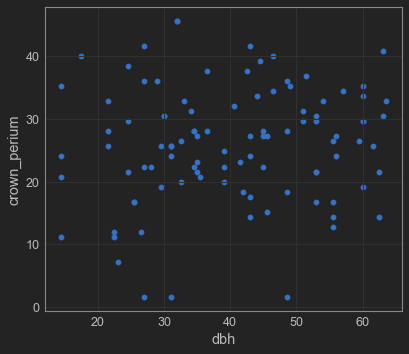

In [124]:
import matplotlib.pyplot as plt
x = train["dbh"]
y = train["crown_perim"]
plt.scatter(x,y)
plt.xlabel("dbh")
plt.ylabel("crown_perium")
plt.show()

In [125]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split, GridSearchCV

target = train["dbh"]
train = train.drop(["dbh"],axis=1)

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

kf = KFold(n_splits=100,random_state=0)
rf = RFR()
results = []
for X_index, Y_index in kf.split(train):
    X_train = train.loc[X_index]
    Y_train = train.loc[Y_index]
    X_target, Y_target = target[X_index], target[Y_index]
    params = {'n_estimators'  : [10, 30, 50, 100, 1000], 'n_jobs': [-1]}
#     print(Y_train)
    cv = GridSearchCV(rf, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
    rf.fit(X_train,X_target)
    X_pred = rf.predict(X_train)
    Y_pred = rf.predict(Y_train)
    results.append(mean_squared_error(Y_target,Y_pred))

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [127]:
results = np.array(results)
print('RMSE train : %.3f, test : %.3f' % (
    np.sqrt(mean_squared_error(X_target, X_pred)),
    np.sqrt(results.mean())))

RMSE train : 4.847, test : 12.822


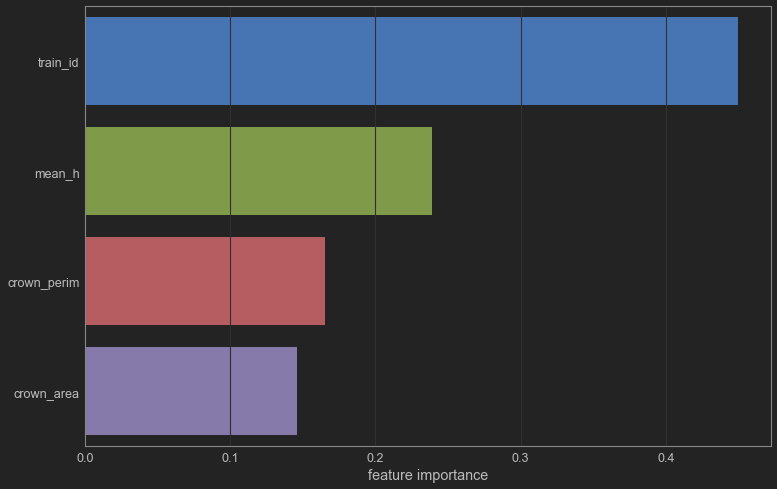

In [114]:
import seaborn as sns
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 7))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking
                                                                    ])
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

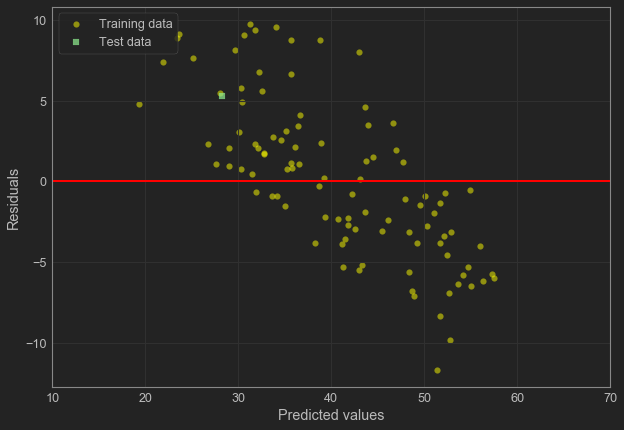

In [128]:
plt.figure(figsize = (10, 7))
plt.scatter(X_pred, X_pred - X_target, c = 'yellow', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
plt.scatter(Y_pred, Y_pred - Y_target, c = 'lightgreen', marker = 's', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 10, xmax = 70, lw = 2, color = 'red')
plt.xlim([10, 70])
plt.show()

In [110]:
pred = pd.DataFrame()
pred["Id"] = test["test_id"]
pred["dbh"] = rf.predict(test)
pred["dbh"] = (pred["dbh"]*2).round(0)/2
pred.to_csv("DBH_RF_LOO.csv", index=False)